# Data Visualization Portfolio Project

## _Analyzis on Life Expectancy and GDP_

The project goal is to analyze, prepare, and plot data in order to answer questions in a meaningful way.
Useful link: https://www.itl.nist.gov/div898/handbook/eda/section1/eda11.htm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The dataset provided in _'all_data.csv'_ has 4 columns and 94 rows. It includes:
- `Country`: categorical variable, there are 6 counties as follows: 'Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe',
- `Year`: numerical varible, it refers to a certain year from 2000 to 2015,
- `Life expectany at birth (years)`: numerical variable, it represents the expected lifetime,
- `GDP`: Gross Domestic Product (GDP) is a monetary measure of the market value of all the final goods and services produced in a specific time period by a country or countries. GDP is most often used by the government of a single country to measure its economic health.

During the analysis the following questions are in the focus:

- Has life expectancy increased over time in the six nations?
- Has GDP increased over time in the six nations?
- Is there a correlation between GDP and life expectancy of a country?
- What is the average life expectancy in these nations?
- What is the distribution of that life expectancy?



## 1. Loading the dataset

In [4]:
df = pd.read_csv('all_data.csv')
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [5]:
col_dict = dict(zip(df.columns, ['country', 'year', 'life_exp', 'gdp']))

df = df.rename(columns=col_dict, errors="raise")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   country   96 non-null     object 
 1   year      96 non-null     int64  
 2   life_exp  96 non-null     float64
 3   gdp       96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


## 2. Explore the data

In [6]:
df.shape

(96, 4)

In [7]:
df.country.unique()

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

In [8]:
df.year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015])

#### Plotting the raw dataset

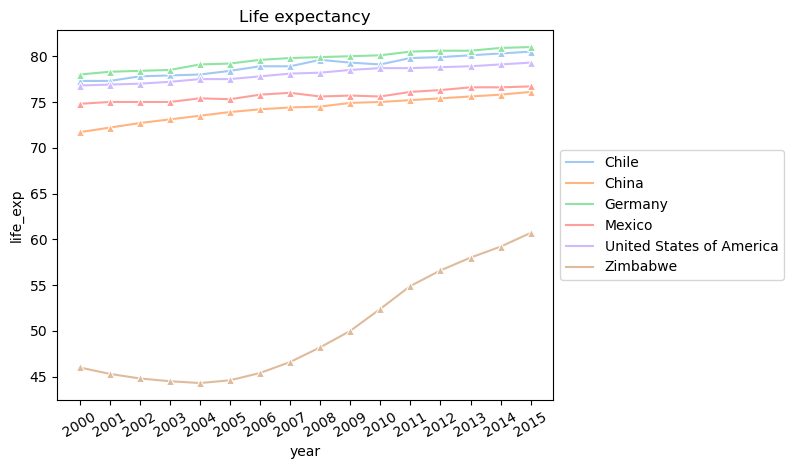

<Figure size 640x480 with 0 Axes>

In [11]:
ax2 = plt.subplot()
sns.lineplot(x='year', y='life_exp', data=df, hue='country', marker='^', palette='pastel')
ax2.set_xticks(df.year.unique())
ax2.tick_params(axis='x', rotation=30)
plt.title('Life expectancy')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.show()
plt.clf()

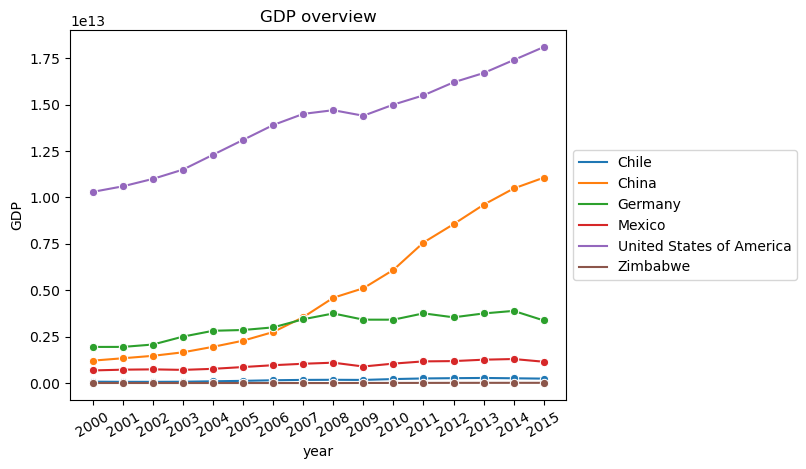

<Figure size 640x480 with 0 Axes>

In [12]:
ax1 = plt.subplot()
sns.lineplot(x='year', y='gdp', data=df, hue='country', marker='o')
ax1.set_xticks(df.year.unique())
ax1.tick_params(axis='x', rotation=30)
plt.title('GDP overview')
plt.ylabel('GDP')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.show()
plt.clf()

## 2. Univariate analysis - Life expectancy

Based on the _GDP overview_ plot, the `gdp`shall be examined for each country separately, because it does not provide details on the variation for developing countries.

/Users/kbalazs/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


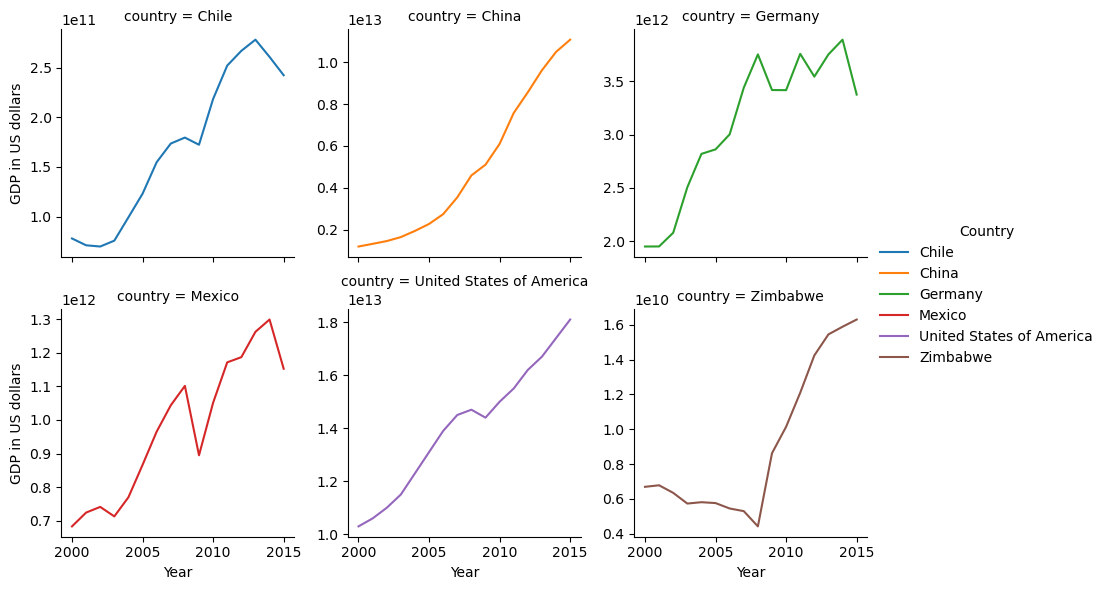

In [84]:
graphGDP = sns.FacetGrid(data=df, col='country', col_wrap=3, hue='country', sharey=False)

graphGDP = (graphGDP.map(sns.lineplot, 'year', 'gdp')
                        .add_legend(title='Country')
                        .set_axis_labels('Year', 'GDP in US dollars'))
plt.subplots_adjust(hspace=0.23)
plt.show()

#### Plotting the histograms

The distribution of the `GDP` is right skewed, where most of the values are on left-hand side. The distribution of the `Life expactancy` is the opposite. It is left skewed. It is a good approach to examine the data divided into smaller groups based on countries. The distribution could be described as a _power law distribution_.

The figures are supported with rug plots, which is showing the location of an individual observation.

Text(0.5, 0, 'GDP in US. dollars')

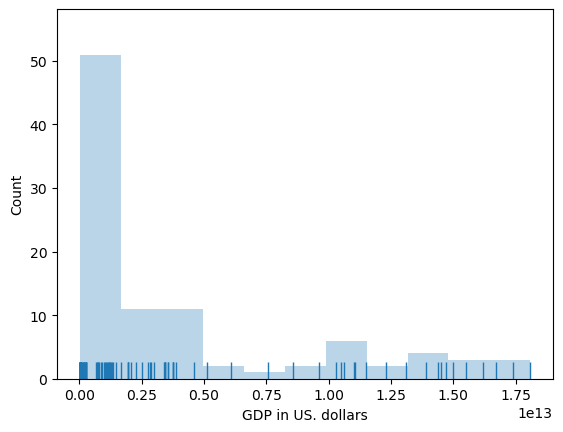

In [49]:
sns.histplot(df.gdp, alpha= 0.3, kde=False, element="step", edgecolor='none')
sns.rugplot(df.gdp, height=0.045)
plt.xlabel('GDP in US. dollars')

Text(0.5, 0, 'Life expectancy [years]')

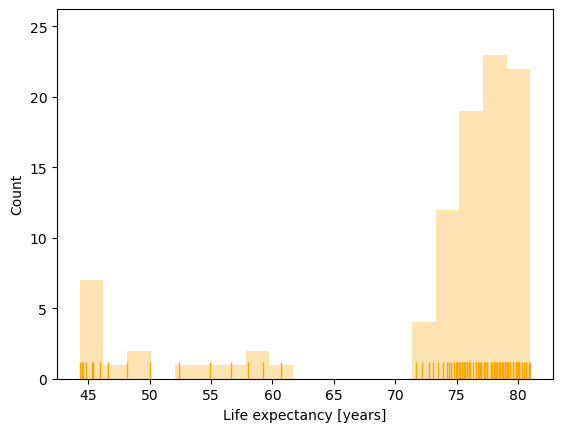

In [55]:
sns.histplot(df.life_exp, alpha= 0.3, kde=False, element="step", color='orange', edgecolor='none')
sns.rugplot(df.life_exp, height=0.045, color='orange')
plt.xlabel('Life expectancy [years]')

#### Violin plots

On the left, China and the USA have a relatively wide range of GDP values. Considering the line-plot titled with 'GDP overview'.
On the right, Zimbabwe shows descripancy from the other countries.

Text(0.5, 0, 'Life expactency [years]')

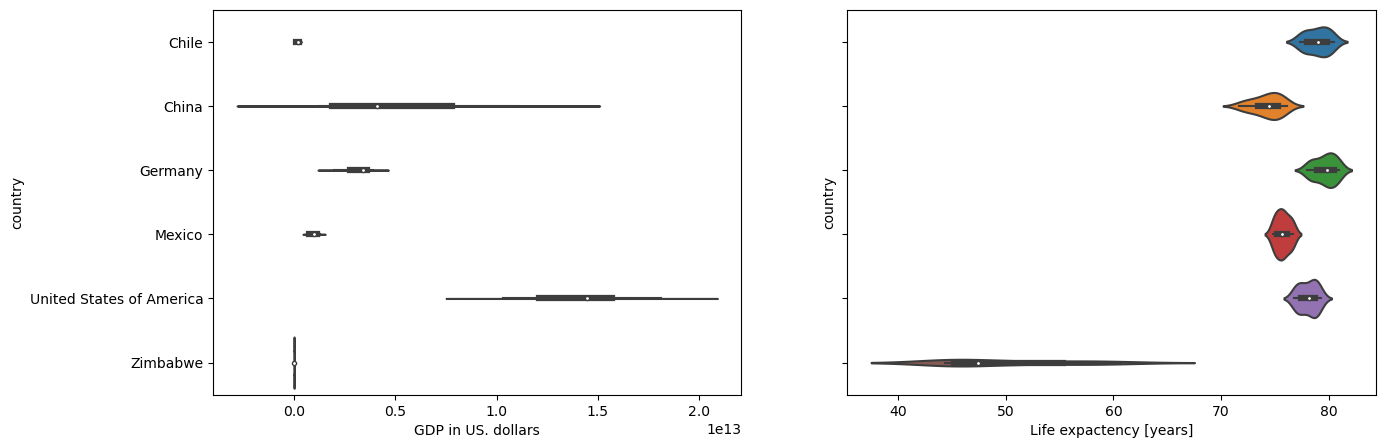

In [61]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15,5))
axes[0] = sns.violinplot(ax=axes[0], x=df.gdp, y=df.country)
axes[0].set_xlabel('GDP in US. dollars')
axes[1] = sns.violinplot(ax=axes[1], x=df.life_exp, y=df.country)
axes[1].set_xlabel('Life expactency [years]')

#### Violin combined with Swarm plot

/Users/kbalazs/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 56.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/kbalazs/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 56.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 25.722222222222214, 'Life expectancy [years]')

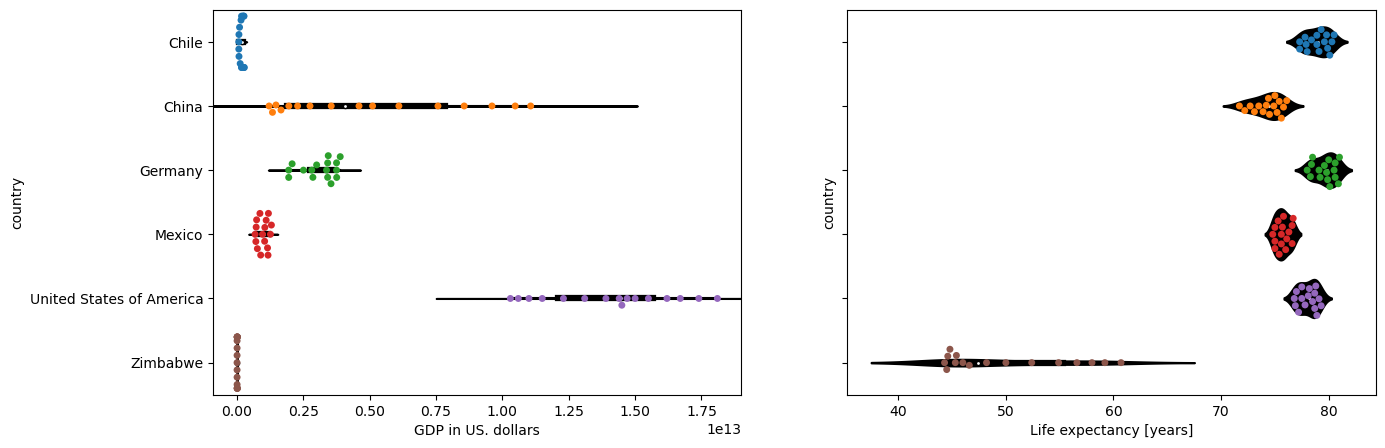

In [73]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15,5))
axes[0] = sns.violinplot(ax=axes[0], x=df.gdp, y=df.country, color='black')
axes[0] = sns.swarmplot(ax=axes[0], x=df.gdp, y=df.country, hue=df.country)
axes[0].legend().remove()
axes[0].set_xlabel('GDP in US. dollars')
axes[1] = sns.violinplot(ax=axes[1], x=df.life_exp, y=df.country, color='black')
axes[1] = sns.swarmplot(ax=axes[1], x=df.life_exp, y=df.country, hue=df.country)
axes[1].legend().remove()
axes[1].set_xlabel('Life expectancy [years]')

#### Barplot for the means

In [77]:
df_means = df.drop('year', axis=1 ).groupby('country').mean().reset_index()
df_means

,country,life_exp,gdp
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09


All of the countries except for Zimbabwe have values in the mid-to-high 70s. This is probably explains the skew in the distribution above.

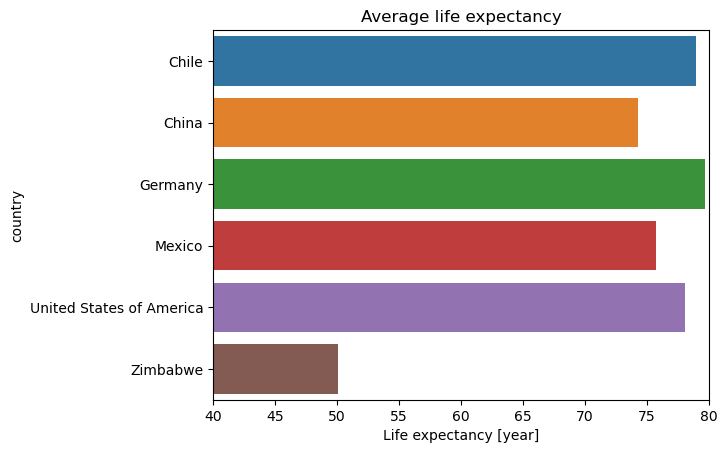

In [82]:
sns.barplot(x='life_exp', y='country', data=df_means)
plt.xlabel('Life expectancy [year]')
plt.title('Average life expectancy')
plt.xlim((40, 80))
plt.show()

In this bar plot, Zimbabwe is not even visible where Chile is just barely seen. In comparison the USA has a huge GDP compared to the rest. China, Germany and Mexico seem to be relatively close in figures.

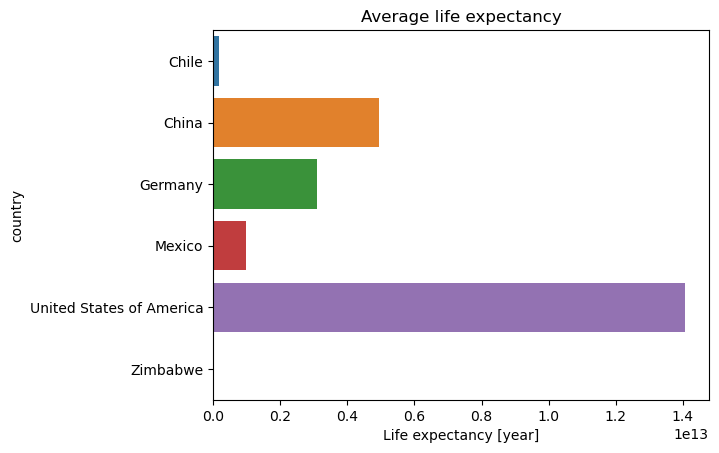

In [83]:
sns.barplot(x='gdp', y='country', data=df_means)
plt.xlabel('Life expectancy [year]')
plt.title('Average life expectancy')
plt.show()

## 3. Bivariate analysis: GDP and Life expectancy

The variability of the GDP is huge. The difference between the minimum value and the maximum is 1.8x10^13.

In [177]:
np.format_float_scientific(np.max(df.gdp) - np.min(df.gdp))

'1.80955842972e+13'

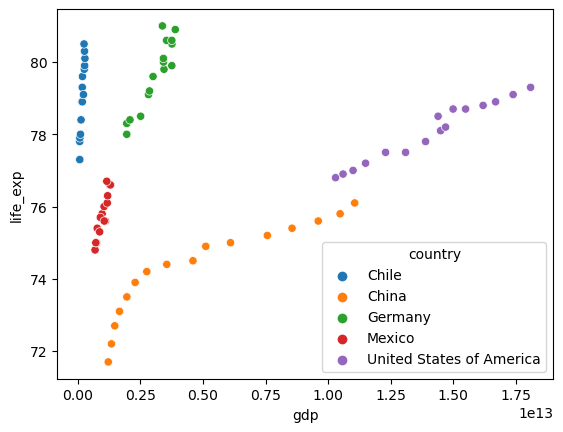

In [167]:
sns.scatterplot(x='gdp', y='life_exp', data=df[df.life_exp>65], hue='country')
plt.show()

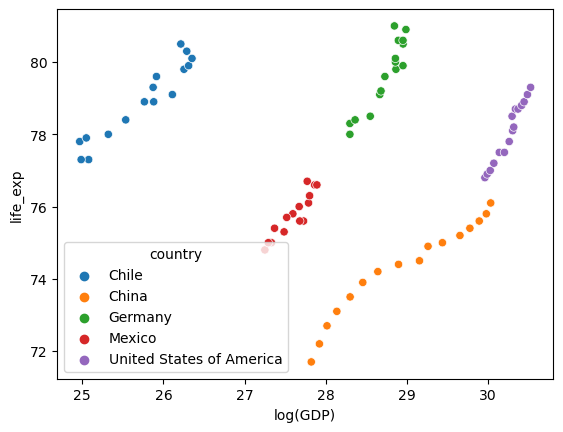

In [169]:
sns.scatterplot(x=np.log(df.gdp), y='life_exp', data=df[df.life_exp>65], hue='country')
plt.xlabel('log(GDP)')
plt.title('')
plt.show()

/Users/kbalazs/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


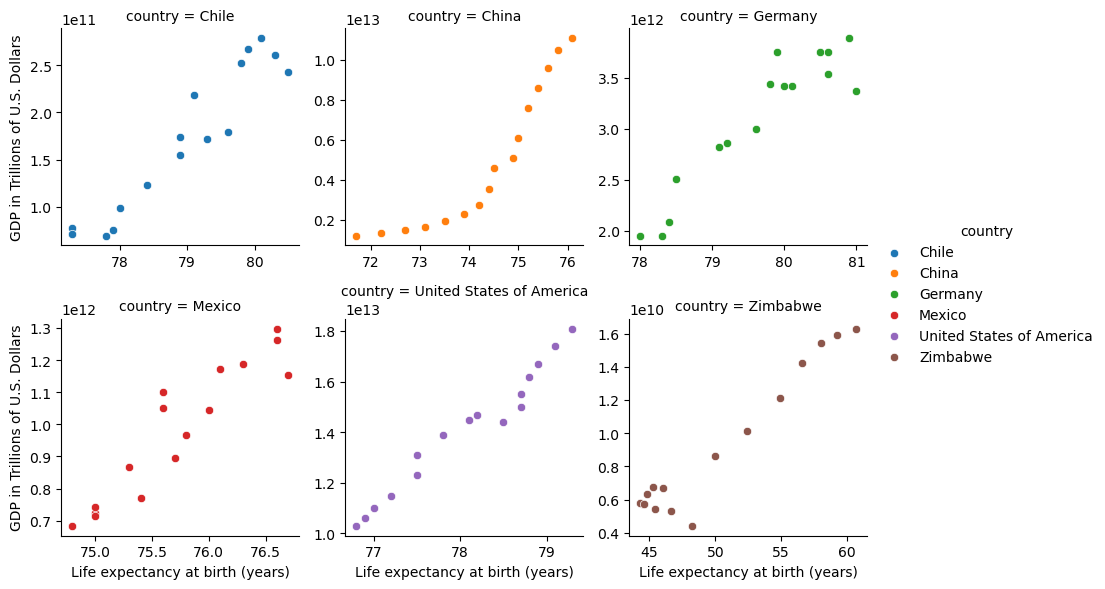

In [86]:
graph = sns.FacetGrid(df, col="country", col_wrap=3,
                      hue = "country", sharey = False, sharex = False)
graph = (graph.map(sns.scatterplot,"life_exp", "gdp")
         .add_legend()
         .set_axis_labels("Life expectancy at birth (years)", "GDP in Trillions of U.S. Dollars"));

The following code will provide an insight to the __covariance__ and the __correlation__ between the variables `GDP` and `Life expactancy`.

In [179]:
cov_matrix = np.cov(df.life_exp, df.gdp)
cov_matrix

array([[1.13910417e+02, 1.90386943e+13],
       [1.90386943e+13, 2.70146436e+25]])

Covariance can range from negative infinity to positive infinity. A positive covariance indicates that a larger value of one variable is associated with a larger value of the other.

In this case: covariance is 1.9x10^13

In [182]:
from scipy.stats import pearsonr, chi2_contingency

corr, p = pearsonr(df.life_exp, df.gdp)
corr

0.343206748449156

Like covariance, Pearson Correlation (often referred to simply as “correlation”) is a scaled form of covariance. It also measures the strength of a linear relationship, but ranges from -1 to +1, making it more interpretable.

Highly associated variables with a positive linear relationship will have a correlation close to 1. Highly associated variables with a negative linear relationship will have a correlation close to -1. Variables that do not have a linear association (or a linear association with a slope of zero) will have correlations close to 0.

Generally, a correlation larger than about 0.3 indicates a linear association. A correlation greater than about 0.6 suggestions a strong linear association. In this case, it indicates a linear association with 0.34 value.

## Conclusions

Has life expectancy increased over time in the six nations?

* Yes, it has been increased.

Has GDP increased over time in the six nations?

* Yes, it has. Faceted line charts have been made to show this issue.
    
Is there a correlation between GDP and life expectancy of a country?

* Yes. Scatter plots are showing positive correlation of these two variables. Also, Pearson Correlation has evaluated with value of 0.34. It means a linear association.
    
What is the average life expectancy in these nations?

* Average life expectancies are shown in bar charts, after the data was aggregated with Pandas' groupby-function.
    
What is the distribution of that life expectancy?

* Life expectancy has left-skewed distribution, where most of the data has been found to the right. Histograms were combined with rug plot for the visualization.
    